In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2016-01-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2016_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-01-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8581     ÎÇ®Íµ¨  14850     ÎÇ®Íµ¨   
1   2016-01-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061     ÎÇ®Íµ¨   6250     ÎÇ®Íµ¨   
2   2016-01-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3300     ÎÇ®Íµ¨   4375     ÎÇ®Íµ¨   
3   2016-01-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2580     ÎÇ®Íµ¨   2600     ÎÇ®Íµ¨   
4   2016-01-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4800     ÎÇ®Íµ¨   5980     ÎÇ®Íµ¨   
5   2016-01-07     ÎåÄÌåå                      1.0„éè   3815     ÎÇ®Íµ¨   4948     ÎÇ®Íµ¨   
6   2016-01-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9500     ÎÇ®Íµ¨   9500     ÎÇ®Íµ¨   
7   2016-01-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4089     ÎÇ®Íµ¨   5300     ÎÇ®Íµ¨   
8   2016-01-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    630     ÎÇ®Íµ¨    630     ÎÇ®Íµ¨   
9   2016-01-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240     ÎÇ®Íµ¨   1240     ÎÇ®Íµ¨   
10  2016-01-07      Î¨¥                   2.0„éè 1Í∞ú    980     ÎÇ®Íµ¨   1686     ÎÇ®Íµ¨   
11  2016-01-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     ÎÇ®Íµ¨   3430     ÎÇ®Íµ¨   
12  2016-01-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2250     ÎÇ®Íµ¨   2300     ÎÇ®Íµ¨   
13  2016-01-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  31920     ÎÇ®Íµ¨  38525     ÎÇ®Íµ¨   
14  2016-01-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞    995     ÎÇ®Íµ¨   1680     ÎÇ®Íµ¨   
15  2016-01-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6500     ÎÇ®Íµ¨   6562     ÎÇ®Íµ¨   
16  2016-01-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13650     ÎÇ®Íµ¨  13650     ÎÇ®Íµ¨   
17  2016-01-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   9078     ÎÇ®Íµ¨  15923     ÎÇ®Íµ¨   
18  2016-01-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2016-01-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
20  2016-01-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1120     ÎÇ®Íµ¨   1130     ÎÇ®Íµ¨   
21  2016-01-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     ÎÇ®Íµ¨   7140     ÎÇ®Íµ¨   
22  2016-01-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39800     ÎÇ®Íµ¨  53800     ÎÇ®Íµ¨   
23  2016-01-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2763     ÎÇ®Íµ¨   3186     ÎÇ®Íµ¨   
24  2016-01-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
25  2016-01-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600     ÎÇ®Íµ¨   6600     ÎÇ®Íµ¨   
26  2016-01-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2580     ÎÇ®Íµ¨   3000     ÎÇ®Íµ¨   
27  2016-01-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1980     ÎÇ®Íµ¨   2780     ÎÇ®Íµ¨   
28  2016-01-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11793     ÎÇ®Íµ¨  24474     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6269   73.06%  11,716  
1     189    3.12%   6,156  
2    1075   32.58%   3,838  
3      20    0.78%   2,590  
4    1180   24.58%   5,390  
5    1133    29.7%   4,382  
6       0     0.0%   9,500  
7    1211   29.62%   4,695  
8       0     0.0%     630  
9       0     0.0%   1,240  
10    706   72.04%   1,333  
11      0     0.0%   3,430  
12     50    2.22%   2,275  
13   6605   20.69%  35,223  
14    685   68.84%   1,338  
15     62    0.95%   6,531  
16      0     0.0%  13,650  
17   6845    75.4%  12,501  
18    134    5.79%   2,383  
19      0     0.0%   1,630  
20     10    0.89%   1,125  
21    190    2.73%   7,045  
22  14000   35.18%  46,800  
23    423   15.31%   2,975  
24      0     0.0%     730  
25      0     0.0%   6,600  
26    420   16.28%   2,790  
27    800    40.4%   2,380  
28  12681  107.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2016-04-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2016_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-04-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8581     ÎÇ®Íµ¨  17850     ÎÇ®Íµ¨   
1   2016-04-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061     ÎÇ®Íµ¨   6250     ÎÇ®Íµ¨   
2   2016-04-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4620     ÎÇ®Íµ¨   6980     ÎÇ®Íµ¨   
3   2016-04-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2480     ÎÇ®Íµ¨   2580     ÎÇ®Íµ¨   
4   2016-04-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5800     ÎÇ®Íµ¨   7228     ÎÇ®Íµ¨   
5   2016-04-07     ÎåÄÌåå                      1.0„éè   4966     ÎÇ®Íµ¨   5102     ÎÇ®Íµ¨   
6   2016-04-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9600     ÎÇ®Íµ¨   9950     ÎÇ®Íµ¨   
7   2016-04-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5300     ÎÇ®Íµ¨   
8   2016-04-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    630     ÎÇ®Íµ¨    630     ÎÇ®Íµ¨   
9   2016-04-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240     ÎÇ®Íµ¨   1240     ÎÇ®Íµ¨   
10  2016-04-07      Î¨¥                   2.0„éè 1Í∞ú   1680     ÎÇ®Íµ¨   2383     ÎÇ®Íµ¨   
11  2016-04-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2980     ÎÇ®Íµ¨   3430     ÎÇ®Íµ¨   
12  2016-04-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7930     ÎÇ®Íµ¨   9480     ÎÇ®Íµ¨   
13  2016-04-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23946     ÎÇ®Íµ¨  26099     ÎÇ®Íµ¨   
14  2016-04-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1695     ÎÇ®Íµ¨   3280     ÎÇ®Íµ¨   
15  2016-04-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6562     ÎÇ®Íµ¨   6791     ÎÇ®Íµ¨   
16  2016-04-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14500     ÎÇ®Íµ¨  14900     ÎÇ®Íµ¨   
17  2016-04-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13055     ÎÇ®Íµ¨  13823     ÎÇ®Íµ¨   
18  2016-04-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2016-04-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1590     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
20  2016-04-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1120     ÎÇ®Íµ¨   1130     ÎÇ®Íµ¨   
21  2016-04-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44950     ÎÇ®Íµ¨  55500     ÎÇ®Íµ¨   
22  2016-04-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   3540     ÎÇ®Íµ¨   6950     ÎÇ®Íµ¨   
23  2016-04-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  32900     ÎÇ®Íµ¨  39800     ÎÇ®Íµ¨   
24  2016-04-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3007     ÎÇ®Íµ¨   3186     ÎÇ®Íµ¨   
25  2016-04-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2016-04-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600     ÎÇ®Íµ¨   6600     ÎÇ®Íµ¨   
27  2016-04-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2580     ÎÇ®Íµ¨   3200     ÎÇ®Íµ¨   
28  2016-04-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1879     ÎÇ®Íµ¨   2780     ÎÇ®Íµ¨   
29  2016-04-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11793     ÎÇ®Íµ¨  18562     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    9269  108.02%  13,216  
1     189    3.12%   6,156  
2    2360   51.08%   5,800  
3     100    4.03%   2,530  
4    1428   24.62%   6,514  
5     136    2.74%   5,034  
6     350    3.65%   9,775  
7     935   21.42%   4,833  
8       0     0.0%     630  
9       0     0.0%   1,240  
10    703   41.85%   2,032  
11    450    15.1%   3,205  
12   1550   19.55%   8,705  
13   2153    8.99%  25,023  
14   1585   93.51%   2,488  
15    229    3.49%   6,677  
16    400    2.76%  14,700  
17    768    5.88%  13,439  
18    134    5.79%   2,383  
19     40    2.52%   1,610  
20     10    0.89%   1,125  
21  10550   23.47%  50,225  
22   3410   96.33%   5,245  
23   6900   20.97%  36,350  
24    179    5.95%   3,097

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2016-07-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2016_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-07-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     ÎÇ®Íµ¨   8581     ÎÇ®Íµ¨   
1   2016-07-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061     ÎÇ®Íµ¨   6250     ÎÇ®Íµ¨   
2   2016-07-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2280     ÎÇ®Íµ¨   2768     ÎÇ®Íµ¨   
3   2016-07-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2480     ÎÇ®Íµ¨   2480     ÎÇ®Íµ¨   
4   2016-07-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4276     ÎÇ®Íµ¨   5580     ÎÇ®Íµ¨   
5   2016-07-07     ÎåÄÌåå                      1.0„éè   3242     ÎÇ®Íµ¨   3633     ÎÇ®Íµ¨   
6   2016-07-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11000     ÎÇ®Íµ¨  11950     ÎÇ®Íµ¨   
7   2016-07-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5300     ÎÇ®Íµ¨   
8   2016-07-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    590     ÎÇ®Íµ¨    590     ÎÇ®Íµ¨   
9   2016-07-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240     ÎÇ®Íµ¨   1240     ÎÇ®Íµ¨   
10  2016-07-07      Î¨¥                   2.0„éè 1Í∞ú   1780     ÎÇ®Íµ¨   1984     ÎÇ®Íµ¨   
11  2016-07-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2980     ÎÇ®Íµ¨   3430     ÎÇ®Íµ¨   
12  2016-07-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7930     ÎÇ®Íµ¨   8930     ÎÇ®Íµ¨   
13  2016-07-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23946     ÎÇ®Íµ¨  26700     ÎÇ®Íµ¨   
14  2016-07-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   5162     ÎÇ®Íµ¨   6153     ÎÇ®Íµ¨   
15  2016-07-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  14300     ÎÇ®Íµ¨   
16  2016-07-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11985     ÎÇ®Íµ¨  13055     ÎÇ®Íµ¨   
17  2016-07-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1566     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
18  2016-07-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1540     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
19  2016-07-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1120     ÎÇ®Íµ¨   1130     ÎÇ®Íµ¨   
20  2016-07-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39950     ÎÇ®Íµ¨  44000     ÎÇ®Íµ¨   
21  2016-07-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4850     ÎÇ®Íµ¨   7140     ÎÇ®Íµ¨   
22  2016-07-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39800     ÎÇ®Íµ¨  39900     ÎÇ®Íµ¨   
23  2016-07-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1786     ÎÇ®Íµ¨   2003     ÎÇ®Íµ¨   
24  2016-07-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
25  2016-07-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600     ÎÇ®Íµ¨   6600     ÎÇ®Íµ¨   
26  2016-07-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2580     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
27  2016-07-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1879     ÎÇ®Íµ¨   2790     ÎÇ®Íµ¨   
28  2016-07-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11793     ÎÇ®Íµ¨  24474     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1156   15.57%   8,003  
1     189    3.12%   6,156  
2     488    21.4%   2,524  
3       0     0.0%   2,480  
4    1304    30.5%   4,928  
5     391   12.06%   3,438  
6     950    8.64%  11,475  
7     935   21.42%   4,833  
8       0     0.0%     590  
9       0     0.0%   1,240  
10    204   11.46%   1,882  
11    450    15.1%   3,205  
12   1000   12.61%   8,430  
13   2754    11.5%  25,323  
14    991    19.2%   5,658  
15    800    5.93%  13,900  
16   1070    8.93%  12,520  
17    884   56.45%   2,008  
18     90    5.84%   1,585  
19     10    0.89%   1,125  
20   4050   10.14%  41,975  
21   2290   47.22%   5,995  
22    100    0.25%  39,850  
23    217   12.15%   1,895  
24      0     0.0%     730  
25      0     0.0%   6,600  
26    400    15.5%   2,780  
27    911   48.48%   2,335  
28  126

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2016-10-06"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2016_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-10-06   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6906     ÎÇ®Íµ¨  14850     ÎÇ®Íµ¨   
1   2016-10-06     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061     ÎÇ®Íµ¨   6250     ÎÇ®Íµ¨   
2   2016-10-06    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3142     ÎÇ®Íµ¨   3645     ÎÇ®Íµ¨   
3   2016-10-06     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2490     ÎÇ®Íµ¨   2580     ÎÇ®Íµ¨   
4   2016-10-06    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4850     ÎÇ®Íµ¨   6657     ÎÇ®Íµ¨   
5   2016-10-06     ÎåÄÌåå                      1.0„éè   4466     ÎÇ®Íµ¨   6191     ÎÇ®Íµ¨   
6   2016-10-06   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7900     ÎÇ®Íµ¨   9950     ÎÇ®Íµ¨   
7   2016-10-06     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5300     ÎÇ®Íµ¨   
8   2016-10-06     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    630     ÎÇ®Íµ¨    630     ÎÇ®Íµ¨   
9   2016-10-06     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240     ÎÇ®Íµ¨   1240     ÎÇ®Íµ¨   
10  2016-10-06      Î¨¥                   2.0„éè 1Í∞ú   2880     ÎÇ®Íµ¨   3502     ÎÇ®Íµ¨   
11  2016-10-06    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2980     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
12  2016-10-06     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5266     ÎÇ®Íµ¨   6320     ÎÇ®Íµ¨   
13  2016-10-06      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23940     ÎÇ®Íµ¨  37689     ÎÇ®Íµ¨   
14  2016-10-06     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5980     ÎÇ®Íµ¨   6475     ÎÇ®Íµ¨   
15  2016-10-06  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6562     ÎÇ®Íµ¨   6770     ÎÇ®Íµ¨   
16  2016-10-06   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
17  2016-10-06     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   8800     ÎÇ®Íµ¨   9093     ÎÇ®Íµ¨   
18  2016-10-06    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1608     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2016-10-06     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1540     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
20  2016-10-06     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1130     ÎÇ®Íµ¨   1130     ÎÇ®Íµ¨   
21  2016-10-06    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  48000     ÎÇ®Íµ¨  49450     ÎÇ®Íµ¨   
22  2016-10-06    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     ÎÇ®Íµ¨   7140     ÎÇ®Íµ¨   
23  2016-10-06      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39800     ÎÇ®Íµ¨  39900     ÎÇ®Íµ¨   
24  2016-10-06     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1610     ÎÇ®Íµ¨   2120     ÎÇ®Íµ¨   
25  2016-10-06     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2016-10-06    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250     ÎÇ®Íµ¨   7250     ÎÇ®Íµ¨   
27  2016-10-06   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2580     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
28  2016-10-06     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2780     ÎÇ®Íµ¨   2790     ÎÇ®Íµ¨   
29  2016-10-06    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   9248     ÎÇ®Íµ¨  24474     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7944  115.03%  10,878  
1     189    3.12%   6,156  
2     503   16.01%   3,394  
3      90    3.61%   2,535  
4    1807   37.26%   5,754  
5    1725   38.63%   5,329  
6    2050   25.95%   8,925  
7     935   21.42%   4,833  
8       0     0.0%     630  
9       0     0.0%   1,240  
10    622    21.6%   3,191  
11      0     0.0%   2,980  
12   1054   20.02%   5,793  
13  13749   57.43%  30,815  
14    495    8.28%   6,228  
15    208    3.17%   6,666  
16      0     0.0%  13,500  
17    293    3.33%   8,947  
18    842   52.36%   2,029  
19     90    5.84%   1,585  
20      0     0.0%   1,130  
21   1450    3.02%  48,725  
22    190    2.73%   7,045  
23    100    0.25%  39,850  
24    510   31.68%   1,865

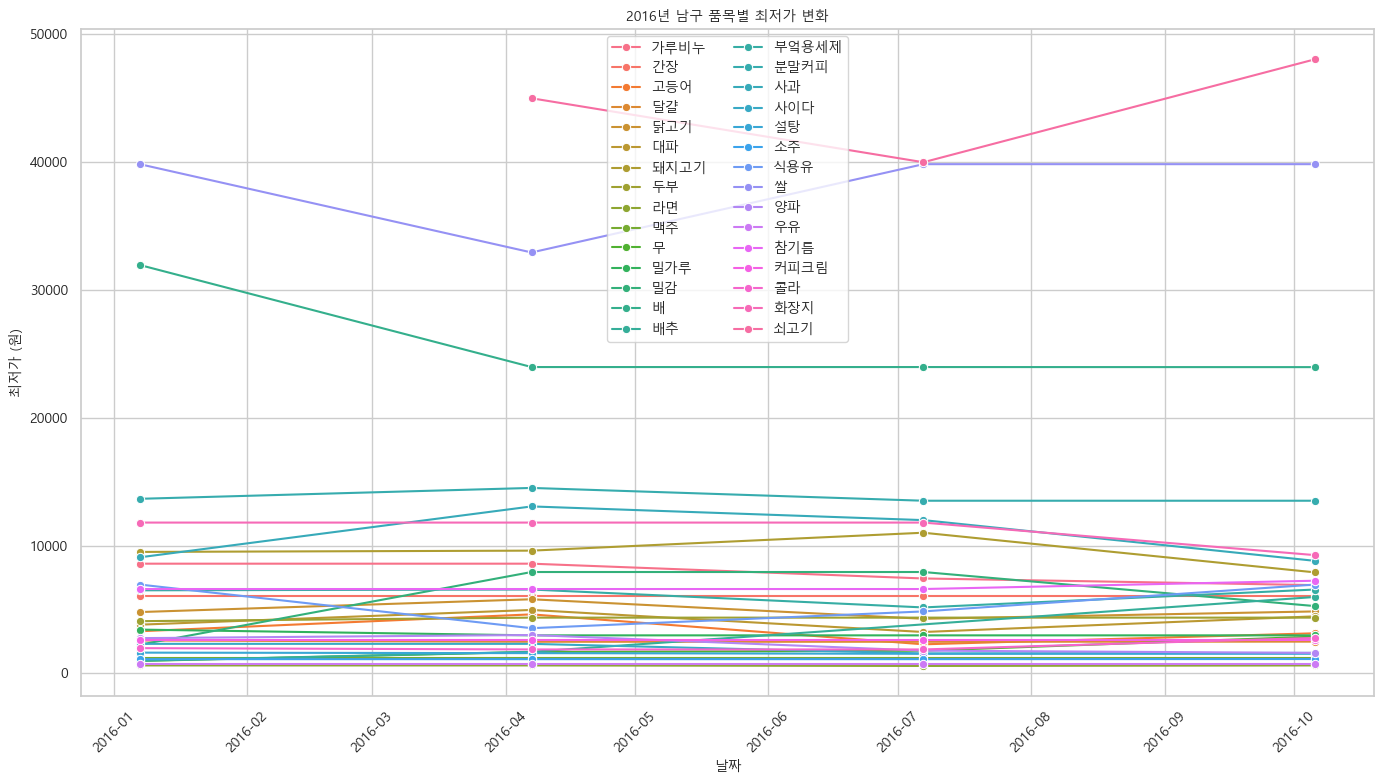

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2016_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2016_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2016_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2016_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2016ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2016_min.csv", index=False, encoding="utf-8-sig")

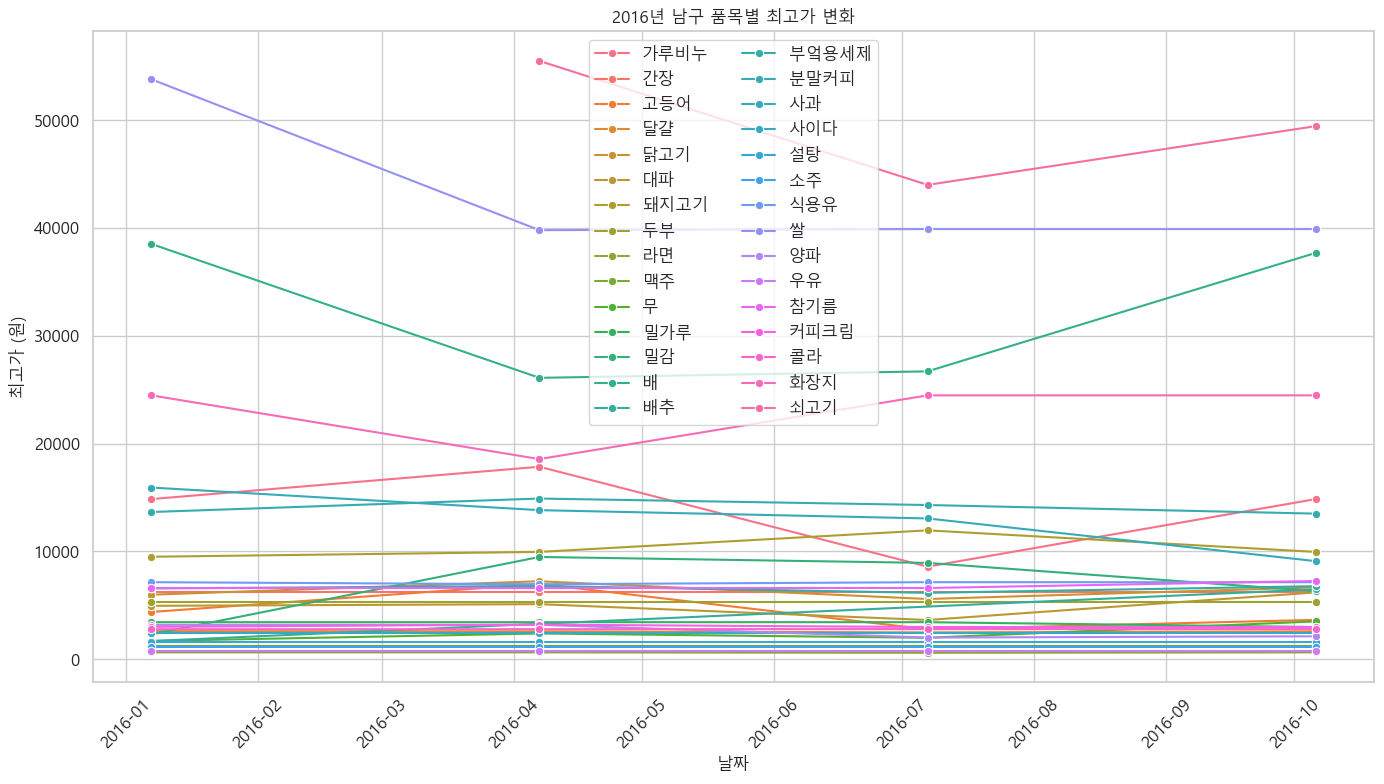

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2016_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2016_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2016_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2016_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2016ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2016_max.csv", index=False, encoding="utf-8-sig")